Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

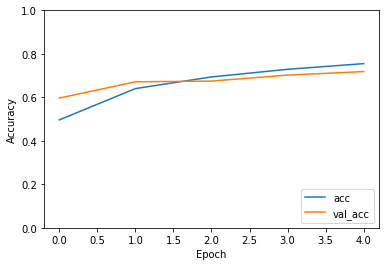

10000/10000 - 2s - loss: 0.8190 - acc: 0.7184
0.7184


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, initializers
import matplotlib.pyplot as plt
import random 
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

def standardize(input):
    mean = np.mean(input)
    std = np.std(input)
    return (input - mean) / std

train_images, test_images = standardize(train_images)  , standardize(test_images) 

#原本的程式碼train_images, test_images = train_images / 255.0,test_images / 255.0
#原版是直接除以255，因為使用matplot來顯示的時候RGB的數字必須要在0~1之間，
#不然會出現錯誤Clipping input data to the valid range for imshow with RGB data
#所以若要套用一般NORMALIZATION的話(也就是MEAN為0，介於-1到1)
#必須要把下面的顯示圖像功能關掉才不會出現錯誤

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,
                   validation_data=(test_images, test_labels))

print(model.metrics_names)

plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)


